<a href="https://colab.research.google.com/github/juvariashahid/WordTree/blob/master/Homophily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import


In [0]:
import pandas
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import numpy as np

In [0]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
dataset = pandas.read_csv('data1.csv')
dataset.head(2)

In [0]:
dataset['WORD_COUNT'] = dataset['Abs'].apply(lambda x: len(str(x).split(" ")))
dataset[['Abs','WORD_COUNT']].head(100)
dataset.WORD_COUNT.describe()

In [0]:
freq = pandas.Series(' '.join(dataset['Abs'].head(14)).split()).value_counts()[:20]
freq


In [0]:
freq1 =  pandas.Series(' '.join(dataset 
         ['Abs'].head(14)).split()).value_counts()[-20:]
freq1

In [0]:
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [0]:
stop_words = set(stopwords.words("english"))

In [0]:
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [0]:
corpus = []
for i in range(0, 100):
    #Remove punctuations
    string = ""
    string = (dataset['Abs'][i])

    text = re.sub("[^a-zA-Z]", " ", str(string))
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [0]:
dataset.replace('-', np.nan, inplace = True)
dataset = dataset.dropna()

In [0]:
dataset = dataset.dropna()
homophily_occurences = []
homophily_occurences_row = []
keywords = ["homophily"]

for i in range(0,1672):
      string = (dataset['Abs'][i])
      title = (dataset['Title'][i])
      year = (dataset['Year'][i])
      #print("Line Number:",i)
      #print("Abstract: ", string)
      for word in keywords:
        for x in (re.findall(r"([^.]*?%s[^.]*\.)" % word,string)):
          homophily_occurences_row.append(i)
          homophily_occurences.append(x)


#printRows(homophily_occurences_row)
#printAbstracts(homophily_occurences)
        

Lines with only the word Homophily in them

In [0]:
homophily_occurences 
# len(homophily_occurences) = 2197


**Narrowed Down the search for definitions**


In [0]:
dataset = dataset.dropna()
definitions = []
# links = []
row = []
keywords = ["homophily, the", "homophily: the", "as homophily", "The homophily", "known as homophily"]

for i in range(0,1672):
      string = (dataset['Abs'][i])
      title = (dataset['Title'][i])
      year = (dataset['Year'][i])
#       link = (dataset['Link'][i])
#       links.append(link)
      #print("Line number: " , i)
      #print("Abstract: ", string)
      for word in keywords:
        for x in (re.findall(r"([^.]*?%s[^.]*\.)" % word,string)):
          row.append(i)
          definitions.append(x)
      


#printRows(row)
#printAbstracts(definitions)
        

In [0]:
import csv
links = []

with open('data1.csv', 'r') as readFile:
  
  reader = csv.reader(readFile)
  lines = list(reader)

  for i in range(0,80):
    row_number = row[i]
    #print(row[i])
    title = (dataset['Title'][row_number])
    topic = (dataset['Topic'][row_number])
    date = (dataset['Date'][row_number])
    year = (dataset['Year'][row_number])
    for result in search(title, tld="co.in", num=10, stop=1, pause=2):
      print(result)
    link = result
    row_change = [title, topic,date, year, definitions[i], link]
    links.append(link)
    lines[i] = row_change

with open('data2.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

readFile.close()
writeFile.close()

80

In [0]:
pip install beautifulsoup4


In [0]:
pip install google


In [0]:
from googlesearch import search

In [0]:
query = "Geeksforgeeks"
  
for j in search(query, tld="co.in", num=10, stop=1, pause=2): 
    print(j) 
print(j)

In [0]:
with open('data2.csv','r') as readFile:
  reader = csv.reader(readFile)
  lines = list(reader)
  for i in range(0,80):
    row_number = row[i]
    #print(row[i])
    title = (dataset['Title'][row_number])
    for result in search(title, tld="co.in", num=10, stop=1, pause=2):
      print(result)
    link = result
    row_change = [title, topic,date, year, definitions[i], link]
    lines[i] = row_change
    
with open('links.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

readFile.close()
writeFile.close()
    
    

In [0]:
definitions
# len(definitions)

In [0]:
def printRows(definitions):
  for x in definitions:
     print(dataset.iloc[[x]])

  

In [0]:
def printAbstracts(dictionary):
  for x in dictionary:
    print("Abstracts:", x)

**String is one long string containg all sentences that mention homophily**


In [0]:
string = ""
for i in definitions:
  string += i
string

'The homophily principle, that perceived similarities among people produce positive reactions, is a cross-cultural, global phenomenon. The homophily of centrality, tie strength and h-index measured as assortativity coefficient is described to show how institutions of similar properties tend to connect with each other in the graph. Such groupthink is often attributed to homophily, the tendency of individuals to interact with those most like them, and while homophily in the legacy media system is well-studied, there is little research around homophily in the hybrid media system, even as social media platforms like Twitter facilitate the development-and analysis-of virtual political journalism packs. The unique feature of repeat customer visits in the data allows us to examine observational learning in trials and repeats and to separate it from non-informational confounding mechanisms, such as homophily, using a novel test based on the empirical model.The homophily principle that perceive

In [0]:
definitions

Removing punctuation


In [0]:
string = ""
for i in definitions:
  string += i

# define punctuation
punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
# punctuations = ','


no_punct = ""
for char in string:
   if char not in punctuations:
       no_punct = no_punct + char

string = no_punct

In [0]:
string

'The homophily principle that perceived similarities among people produce positive reactions is a crosscultural global phenomenon. The homophily of centrality tie strength and hindex measured as assortativity coefficient is described to show how institutions of similar properties tend to connect with each other in the graph. Such groupthink is often attributed to homophily the tendency of individuals to interact with those most like them and while homophily in the legacy media system is wellstudied there is little research around homophily in the hybrid media system even as social media platforms like Twitter facilitate the developmentand analysisof virtual political journalism packs. The unique feature of repeat customer visits in the data allows us to examine observational learning in trials and repeats and to separate it from noninformational confounding mechanisms such as homophily using a novel test based on the empirical model.The homophily principle that perceived similarities a

**Fun Visualization**

In [0]:
from nltk.corpus import brown
import matplotlib.pyplot as plt
import nltk
from matplotlib import rcParams
import math
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


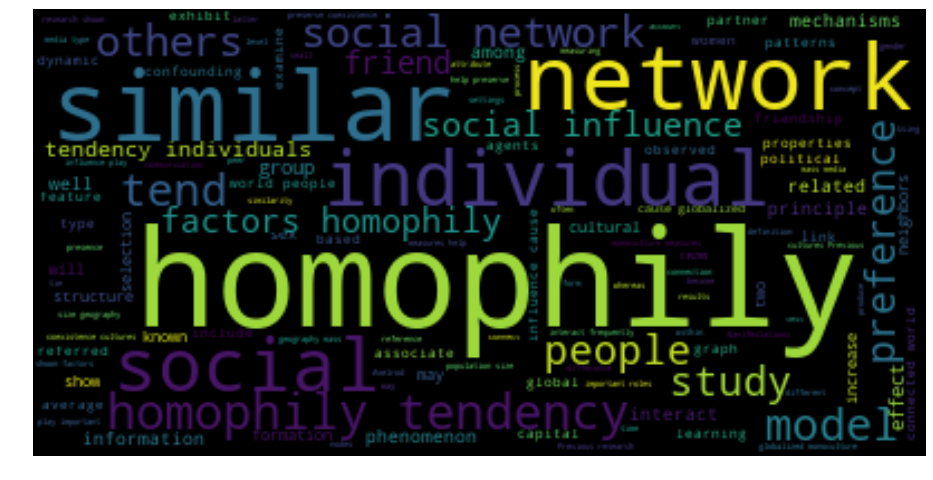

In [0]:
nltk.download('inaugural')
from nltk.corpus import inaugural

#text = "On political questions, many people prefer to consult and learn from those whose political views are similar to their own, thus creating a risk of echo chambers or information cocoons. We test whether the tendency to prefer knowledge from the politically like-minded generalizes to domains that have nothing to do with politics, even when evidence indicates that politically like-minded people are less skilled in those domains than people with dissimilar political views. Participants had multiple opportunities to learn about others' (1) political opinions and (2) ability to categorize geometric shapes. They then decided to whom to turn for advice when solving an incentivized shape categorization task. We find that participants falsely concluded that politically like-minded others were better at categorizing shapes and thus chose to hear from them. Participants were also more influenced by politically like-minded others, even when they had good reason not to be. These results replicate in two independent samples. The findings demonstrate that knowing about others' political views interferes with the ability to learn about their competency in unrelated tasks, leading to suboptimal information-seeking decisions and errors in judgement. Our findings have implications for political polarization and social learning in the midst of political divisions."
wordcloud = WordCloud(max_font_size=60).generate(string)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Key Verbs

In [0]:
from nltk import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:

text = word_tokenize(string)
#text2 = word_tokenize("limits people's social worlds in a way that has powerful implications for the information they receive, the attitudes they form")
for t in nltk.pos_tag(text):
  print(t)
  if t[1] == "VB" or t[1] == "VBZ" or  t[1] == "VBN" or  t[1] == "VBG" or t[1] == "VBD":
    print(t[0])
    #method_trimmed.append(x[x.find(word):])
    


In [0]:
for d in definitions: 
    print(d)

In [0]:
len(definitions)

80

In [0]:
verb_phrase = []
w, h = 8, 5;
phrases = [[0 for x in range(w)] for y in range(h)] 
row_num = []
for i in range(0,20):
    row_num = row[i]
    #print(row_num)
    text = word_tokenize(definitions[i])
    w = definitions[i]
    for t in nltk.pos_tag(text):
      if t[1] == "VB":
        #print(t[0])
        #print(w[w.find(t[0]):])
        verb_phrase.append(w[w.find(t[0]):])
    phrases[i] = verb_phrase
    verb_phrase = verb_phrase[:]
    #print(phrases)
    print(verb_phrase)


  
  

[]
['show how institutions of similar properties tend to connect with each other in the graph.', 'connect with each other in the graph.']
['show how institutions of similar properties tend to connect with each other in the graph.', 'connect with each other in the graph.', 'interact with those most like them, and while homophily in the legacy media system is well-studied, there is little research around homophily in the hybrid media system, even as social media platforms like Twitter facilitate the development-and analysis-of virtual political journalism packs.']
['show how institutions of similar properties tend to connect with each other in the graph.', 'connect with each other in the graph.', 'interact with those most like them, and while homophily in the legacy media system is well-studied, there is little research around homophily in the hybrid media system, even as social media platforms like Twitter facilitate the development-and analysis-of virtual political journalism packs.', 

IndexError: ignored

In [0]:
TRAIN_DATA = [{"content":"organizational research examining the effect of upper echelons on attracting powerful intermediaries to understand how young biotechnology firms establish alliances","entities":[[125,144,"subject "]]},{"content":"political homophily on twitter","entities":[[23,30,"subject "]]},{"content":"the origins of homophily in a large university community","entities":[[30,56,"subject "]]},{"content":"impact of a wide array of characteristics of dutch neighbourhoods and municipalities on contact frequency with one's neighbours, tolerance to neighbours from a different race, generalized social trust and volunteering","entities":[[45,65,"subject "]]},{"content":"impact of a wide array of characteristics of dutch neighbourhoods and municipalities on contact frequency with one's neighbours, tolerance to neighbours from a different race, generalized social trust and volunteering","entities":[[70,84,"subject "]]},{"content":"a full network sample from a recently developed new urbanist neighborhood within a midsized southern city","entities":[[52,74,"subject "]]},{"content":"a full network sample from a recently developed new urbanist neighborhood within a midsized southern city","entities":[[92,105,"subject "]]},{"content":"behavior fundamental to the legislative process--channeling of information and dissemination of voting cues--is patterned in accord with the interpersonal ties of legislators. what are the bases of legislators' bonds of friendship?","entities":[[163,174,"subject "]]},{"content":"previous research on embedded ties with suppliers in an innovation context","entities":[[39,50,"subject "]]},{"content":"intoxication frequency data from a large community-based sample of swedish youth, participants ranging from 12 to 18 years old\"","entities":[[67,80,"subject "]]},{"content":"Here, we use call detail records (CDRs) to examine the population dynamics and manifestations of social and spatial homophily at a macroscopic level among the residents of 23 states of India at the Kumbh Mela, a 3-month-long Hindu festiva","entities":[[172,190,"subject "]]},{"content":"This study examines the organizational network of the extractive sector in Andalusian fishing enclaves.","entities":[[75,103,"subject "]]},{"content":"In particular, we use the measure to analyze homophily in a group of 659 freshman students at a large university","entities":[[69,90,"subject "]]},{"content":"In particular, we use the measure to analyze homophily in a group of 659 freshman students at a large university","entities":[[96,112,"subject "]]},{"content":"We review the Mouw-Lin debate and propose that occupational homophily moderates the role of contact resources in the labor market and that effects of resources depend on labor market institutions","entities":[[170,195,"subject "]]},{"content":"We conducted cross-sectional analysis of young women (aged 15-34) in 14 Demographic and Health Surveys from seven sub-Saharan Africa (SSA) countries with generalized HIV epidemics.","entities":[[41,52,"subject "]]},{"content":"We conducted cross-sectional analysis of young women (aged 15-34) in 14 Demographic and Health Surveys from seven sub-Saharan Africa (SSA) countries with generalized HIV epidemics.","entities":[[114,148,"subject "]]},{"content":"This study aims to investigate the effects of friends who drink to alcohol drinking onset in South Korean adolescences and examine the context of effects within friends network(homophily or diffusion).","entities":[[93,118,"subject "]]},{"content":"In particular, the study used a Multiple Regression Quadratic Assignment Procedure to analyze a network of students belonging to a Chilean university.","entities":[[131,150,"subject "]]}]

In [0]:
len(TRAIN_DATA)

19

In [0]:
import csv

with open('data2.csv', 'r') as readFile:
  
  reader = csv.reader(readFile)
  lines_verbs = list(reader)

  for i in range(0,80):
    row_number = row[i]
    #print(row[i])
    title = (dataset['Title'][row_number])
    topic = (dataset['Topic'][row_number])
    date = (dataset['Date'][row_number])
    year = (dataset['Year'][row_number])
    row_change = [title, topic,date, year, verb_phrase[i]]
    lines_verbs[i] = row_change

with open('verbs.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines_verbs)

readFile.close()
writeFile.close()

NAME ENTITY

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
test = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [0]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [0]:
sent = preprocess(test)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

In [0]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [0]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [0]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In [0]:
ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

NameError: ignored

In [0]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [0]:
#doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
# doc = nlp('The homophily principle, that perceived similarities among  produce positive reactions, is a cross-cultural, global phenomenon.')
doc = nlp('Homophily - our tendency to surround ourselves with others who share our perspectives and opinions about the world is both a part of human nature and an organizing principle underpinning many of our digital social networks. However, when it comes to politics or culture, homophily can amplify tribal mindsets and produce "echo chambers" that degrade the quality, safety, and diversity of discourse online. While several studies have empirically proven this point, few have explored how making users aware of the extent and nature of their political echo chambers influences their subsequent beliefs and actions. In this paper, we introduce Social Mirror, a social network visualization tool that enables a sample of Twitter users to explore the politically-active parts of their social network. We use Social Mirror to recruit Twitter users with a prior history of political discourse to a randomized experiment where we evaluate the effects of different treatments on participants i) beliefs about their network connections, ii) the political diversity of who they choose to follow, and iii) the political alignment of the URLs they choose to share. While we see no effects on average political alignment of shared URLs, we find that recommending accounts of the opposite political ideology to follow reduces participants beliefs in the political homogeneity of their network connections but still enhances their connection diversity one week after treatment. Conversely, participants who enhance their belief in the political homogeneity of their Twitter connections have less diverse network connections 2-3 weeks after treatment. We explore the implications of these disconnects between beliefs and actions on future efforts to promote healthier exchanges in our digital public spheres.')
pprint([(X.text, X.label_) for X in doc.ents])

[('Social Mirror', 'ORG'),
 ('Social Mirror', 'ORG'),
 ('one week', 'DATE'),
 ('Twitter', 'GPE'),
 ('2-3 weeks', 'DATE')]


Finding Methods


In [0]:
dataset = dataset.dropna()
methods = []
row = []
method_trimmed = []
keywords = ["we use", "using", "develop", "we analyse"]

for i in range(0,1672):
      string = (dataset['Abs'][i])
      title = (dataset['Title'][i])
      year = (dataset['Year'][i])
      #print("Line number: " , i)
      #print("Abstract: ", string)
#       print(title, " :")
      for word in keywords:
        for x in (re.findall(r"([^.]*?%s[^.]*\.)" % word,string)):
          methods.append(x)
          index = x.find(word)
          method_trimmed.append(x[x.find(word):])
          row.append(i)

In [0]:
row[0:5]

[3, 3, 3, 8, 9]

In [0]:
methods[0:5]

[' The current study sought to replicate findings of homophily for eating pathology using social network analysis and to test if similarity in eating pathology is present above and beyond homophily for eating disorder risk factors and correlates.',
 ' Homophily for eating pathology, negative affect, and perfectionism were tested as predictors of friendship ties using exponential random graph modeling, adjusting for gender, year in school, and body mass index.',
 ' More longitudinal work using social network analysis is needed to understand the role that personality plays in peer influences on eating pathology.',
 'Intra-ethnic adolescent friendships can provide a safe space for the development of a sense of identity and belonging and this study explores the intra-ethnic friendship experiences of fifteen 11- to 12-year olds with non-Irish heritage in Ireland.',
 ', friends, relatives, and colleagues? (ii) Does adding behavioral node-specific attributes/features to the nodes in a network

In [0]:
method_trimmed[0:5]

['using social network analysis and to test if similarity in eating pathology is present above and beyond homophily for eating disorder risk factors and correlates.',
 'using exponential random graph modeling, adjusting for gender, year in school, and body mass index.',
 'using social network analysis is needed to understand the role that personality plays in peer influences on eating pathology.',
 'development of a sense of identity and belonging and this study explores the intra-ethnic friendship experiences of fifteen 11- to 12-year olds with non-Irish heritage in Ireland.',
 'using the well-established "Big-5 personality model" and "Schwartz sociological behavior model".']

In [0]:
import csv

with open('data1.csv', 'r') as readFile:
  
  reader = csv.reader(readFile)
  lines = list(reader)

  for i in range(0,80):
    row_number = row[i]
    #print(row[i])
    title = (dataset['Title'][row_number])
    topic = (dataset['Topic'][row_number])
    date = (dataset['Date'][row_number])
    year = (dataset['Year'][row_number])
    row_change = [title, topic,date, year, method_trimmed[i]]
    lines[i] = row_change

with open('methods.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

readFile.close()
writeFile.close()

Word Tree


In [0]:
string = 'The homophily principle, that perceived similarities among people produce positive reactions, is a cross-cultural, global phenomenon. The homophily of centrality, tie strength and h-index measured as assortativity coefficient is described to show how institutions of similar properties tend to connect with each other in the graph. Such groupthink is often attributed to homophily, the tendency of individuals to interact with those most like them, and while homophily in the legacy media system is well-studied, there is little research around homophily in the hybrid media system, even as social media platforms like Twitter facilitate the development-and analysis-of virtual political journalism packs. The unique feature of repeat customer visits in the data allows us to examine observational learning in trials and repeats and to separate it from non-informational confounding mechanisms, such as homophily, using a novel test based on the empirical model.The homophily principle that perceived similarities among people produce positive reactions is a cross-cultural, global phenomenon. The homophily index, a measure of segregation in networks with multiple types of nodes, is shown to play a key role in the emergence of fashion cycles. The homophily patterns of the co-presence network layer, however, does not yield any meaningful information about other network layers. However, contagion effects are usually difficult to identify, as they are often entangled with other factors, such as homophily in the selection process, the individual\'s preference for the same social settings, etc.The observation that individuals tend to be friends with people who are similar to themselves, commonly known as homophily, is a prominent feature of social networks.The observation that individuals tend to be friends with people who are similar to themselves, commonly known as homophily, is a prominent feature of social networks. We start from the assumption that individual resources that are similar in some aspects are more likely to be linked by specific relations: this phenomenon is also referred to as homophily and emerges in a variety of relational domains. This phenomena is typically explained as homophily in network science. We fit ERGMs and TERGMs to the network as a function of nodal, dyadic and structural statistics terms, accounting for important principles of graph theory such as homophily and structural equivalence.It is well known that individuals in social networks tend to exhibit homophily, the preference of people to associate with others from the same social group or type., publication length, time and quality) and social processes such as homophily (the tendency to cite publications in the same field or with shared authors), cumulative advantage, and transitivity (the tendency to cite references\' references), matter for citations. Two distinct mechanisms account for dependence in an RDS study: homophily, the tendency for individuals to share social ties with others exhibiting similar characteristics, and preferential recruitment, in which recruiters do not recruit uniformly at random from their network alters.Framed conceptually by gender equity, gender homophily, the contest regime of blind peer-review publishing, and the gendered nature of the quantitative-qualitative debate, this study investigated the intersection of authorship, gender, and methodological characteristics of 408 articles published from 2006 to 2010 in 3 major higher education journals. To fill this research gap, this study proposes a new method of measuring network user influence that incorporates peers\' intrinsic factors, interpeer influence factors as homophily effect, and network structure. The redundant indirect causalities and unobserved confounding factors, such as homophily and simultaneity phenomena, contribute to the huge challenges on accurate causal discovery on such human actions. We show that as homophily increases the emergence of marked topological community structures in the networks raises.We predict that people with different political orientations will exhibit systematically different levels of political homophily, the tendency to associate with others similar to oneself in political ideology. The homophily of geographical location among dyadic information transmitters, the addressivity of reposted messages, and the degree of activity and popularity of information transmitters shorten the response time. The precise mechanisms of judgment propagation are not well understood, however, because it is difficult to control for confounding factors such as homophily or dynamic network structures. Agents exhibit homophily, the preference to link with others who are similar to themselves, and they have a limited capacity for links. We start from the assumption that related entities influence each other, and they may be either similar or dissimilar with respect to a given set of properties: the former case is referred to as homophily, and the latter as heterophily. The results demonstrate that homophily observed for violent offending primarily reflects selection of similar others, whereas homophily observed for victimization reflects the tendency among alters to avoid victimized youth. Manifestations of homophily, the notion that individuals tend to interact with others who resemble them, have been observed in many small and intermediate size settings.We study a sequential model of Bayesian social learning in networks in which agents have heterogeneous preferences, and neighbors tend to have similar preferences-a phenomenon known as homophily.We study a sequential model of Bayesian social learning in networks in which agents have heterogeneous preferences, and neighbors tend to have similar preferences-a phenomenon known as homophily.In a connected world where people influence each other, what can cause a globalized monoculture, and which measures help to preserve the coexistence of cultures? Previous research has shown that factors such as homophily, population size, geography, mass media, and type of social influence play important roles. Manifestations of homophily, the notion that individuals tend to interact with others who resemble them, have been observed in many small and intermediate size settings.In a connected world where people influence each other, what can cause a globalized monoculture, and which measures help to preserve the coexistence of cultures? Previous research has shown that factors such as homophily, population size, geography, mass media, and type of social influence play important roles. Similarity is computed in a data-adaptive way based on dimensions such as homophily, propinquity, and recommendation context. Finally, there was homophily effect of academic achievement on academic help network formation. Using a social network perspective, this study examines the differences in sex homophily, the tendency to form their interpersonal network with those from the same sex (men to men, women to women), and their longitudinal changes in an organization.In social networks, it is conventionally thought that two individuals with more overlapped friends tend to establish a new friendship, which could be stated as homophily breeding new connections. If one partner selects friends based on preferences for homophily, then the other partner may befriend the same person regardless of whether they also have homophilic preferences. Referring to social capital theory and its inherent problem of homophily, the interrelation between these two constructs remains ambiguous. The homophily principle from network science was shown to affect MMP-CSNs and THR-CSNs in different ways, despite the presence of conserved topological features. Due to limited capacities of time and resources as well as homophily, top-level scientists may structure their contacts to reduce problems of complexity and uncertainty. Religious beliefs are related to within-group prosociality as well as homophily and parochialism directed to those outside the group. In general, there was homophily for boldness, age, rank and the propensity to both generate and exploit information, but heterophily for sex. We test three hypotheses: (1) that related individuals will have stronger associations; (2) that individuals with low values of average relatedness to their neighbors in the network will have more links and (3) homophily, the tendency of individuals to associate with similar others, will lead to stronger associations among individuals of similar sex, reproductive state, age and rank in the social network. Conversely, geographic and cultural silos within COPs may form due to homophily, the social tendency of individuals to connect with similar others.In a connected world where people influence each other, what can cause a globalized monoculture, and which measures help to preserve the coexistence of cultures? Previous research has shown that factors such as homophily, population size, geography, mass media, and type of social influence play important roles.In social networks, it is conventionally thought that two individuals with more overlapped friends tend to establish a new friendship, which could be stated as homophily breeding new connections.In a connected world where people influence each other, what can cause a globalized monoculture, and which measures help to preserve the coexistence of cultures? Previous research has shown that factors such as homophily, population size, geography, mass media, and type of social influence play important roles.The purpose of this study is to examine the process and the effects of the intermedia dynamics by way of approaching four factors such as homophily, codependence, agenda- sharing and agenda-bombing. The homophily reveals that people tend to exhibit more similar tastes if they have similar demographic information (e. The issue was explored with reference to a tension between social inclusion, the principle of embracing difference, and homophily, the concept that similarity breeds connection. The model simulates qualitative properties currently found in research on adolescent development, namely the role of homophily, the appearance of friendship clusters, and the increase in behavioral homogeneity among friends. Yet, as with other manifestations of peer similarity (often referred to as homophily), the mechanisms generating this relationship are widely debated. A common factor that exists in almost all social networks is homophily: the tendency of social network members to connect to similar members.Definition and Existential Test As there is no a formal definition for social influence, we discuss its definition in terms of several related concepts such as homophily [20], conformity [8, 27], and selection. Using the Exponential Family Random Graph (ERG) model, we show that economic attributes produce mixed results in predicting FTA partners, whereas homophily in region explains FTA tie formation.The Axelrod model is a spatial stochastic model for the dynamics of cultures which includes two important social factors: social influence, the tendency of individuals to become more similar when they interact, and homophily, the tendency of individuals to interact more frequently with individuals who are more similar. We find sex-related differences in communication patterns in a large dataset of mobile phone records and show the existence of temporal homophily, the tendency of similar individuals to participate in communication patterns beyond what would be expected on the basis of their average interaction frequencies. If peer influence occurs in the presence of homophily, then active genotype-environment correlation will be induced. The reason seems to be that we still rely on physical places to reference and give organization to human societies, and thereby provide the conditions for what sociologists refer to as homophily.Current mining algorithms for attributed graphs exploit dependencies between attribute information and edge structure, referred to as homophily. The homophily is defined as the fraction of neighbors belonging to the depression group in this table, whereas it is defined as the fraction of neighbors belonging to the suicide group in Table 1. (11) Guided by multiple network theories such as homophily, embeddedness, and social capital, our goal is twofold: to understand how women engineering faculty construct their mentoring networks; and to display and analyze women engineering faculty\'s mentoring network configurations. In contrast, there has been little theoretical work on the broader phenomenon of homophily, the tendency for individuals to interact with similar others.The Axelrod model is a spatial stochastic model for the dynamics of cultures which, similar to the voter model, includes social influence, but differs from the latter by also accounting for another social factor called homophily, the tendency to interact more frequently with individuals who are more similar.We examine how the speed of learning and best-response processes depends on homophily: the tendency of agents to associate disproportionately with those having similar traits.Conclusions Efforts to improve the number of parental decisions for vaccination should focus on the educational level of the parents as well as homophily of parents and physicians. Endogeneity issues such as homophily, correlated unobservables and simultaneity raise challenges to the researchers interested in establishing causality and in consistently measuring its magnitude.How can minority cultures resist assimilation into a global monolith in an increasingly "small world"? Paradoxically, Axelrod found that local convergence can actually preserve global diversity if cultural influence is combined with homophily, the principle that "likes attract. These findings help explain how depression affects friend selection and have broader implications for understanding selection mechanisms responsible for network patterns such as homophily. While results only partially support research-based homophily, they indicate that scientists use status positions for discriminating between potential partners by selecting collaborators from institutions with a rating similar to their own. We also conducted experiments to study how socialness can be related to network effects such as homophily, social influence and friendship formation. By employing a novel method of measuring within-group homophily, the current study expands the sparse literature on why individuals might change group membership. The former includes social influence, the tendency of individuals to become more similar when they interact, while the latter also accounts for homophily, the tendency to interact more frequently with individuals which are more similar. We provide a detailed discussion over the network formation by taking into account the edge creation factors classified as homophily, confounding and influence.Analysis of email networks reveals properties similar to classic social networks such as homophily (assortativity) and community formation. I show that as homophily increases (so that the probability to link to other nodes of the same type increases and the probability of linking to nodes of some other types decreases) the average distance and diameter of the network are unchanged, while the average clustering in the network increases.Although there is a large literature on social capital, empirical estimates of the effect of social capital may be biased because of social homophily, the tendency of similar people to become friends with each other. Three mechanisms have been tested: the homophily, the balancing, and the gossiping effect. The DOI concepts most relevant to this question include communication channels, the innovation-decision process, homophily, the attributes of the innovation, adopter categories, and opinion leaders. The homophily model predicts that people do not compete for cultural forms.'
punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
# punctuations = ','


no_punct = ""
for char in string:
   if char not in punctuations:
       no_punct = no_punct + char

string = no_punct


a = string.split('.')



In [0]:
a


In [0]:
a

['The homophily principle that perceived similarities among people produce positive reactions is a crosscultural global phenomenon',
 ' The homophily of centrality tie strength and hindex measured as assortativity coefficient is described to show how institutions of similar properties tend to connect with each other in the graph',
 'principle that shook everyone']

In [0]:
treeData = {}
treeData["name"] = "homophily"
# treeData["parent"] = None
treeData["children"] = []

In [0]:
treeData

{'children': [], 'name': 'homophily'}

In [0]:
for i in range(len(a)):
  sentence = a[i].split()
  for j in range(len(sentence)):
    if((sentence[j]) == "homophily"):
      treeNode = {}
      treeNode["word"] = sentence[j+1]
      treeNode["parent"] = sentence[j]
      treeNode["children"] = []
      treeData["children"].append(treeNode)

   
  

In [0]:
treeData

In [0]:
type(treeData['children'])

In [0]:
def getChildList(d, word):
  if(word in d.values()):
    print(word + " exists in this dict")
    return d['children']
  for i in range(len(d['children'])):
    return getChildList(d['children'][i], word)
# 			if(getChildList(d['children'][i], word) == None):
# 				getChildList(d['children'][i], word)

In [0]:
def wordExists(d, word):
	if(word in d.values()):
		return True
	else: 
		for i in range(len(d['children'])):
			# print(wordExists(d['children'][i], word) == None)
			if((wordExists(d['children'][i], word))):
				return True
		return False		
  

In [0]:
' '.join(word for word in sentence[1:])

'homophily principle that perceived similarities among people produce positive reactions is a crosscultural global phenomenon'

In [0]:
for j in range(len(a)):
  sentence = a[j].split()
  print(sentence)
  for i in range(len(sentence) -1):
    print("WORD: " + sentence[i])
    if(wordExists(treeData, sentence[i])):
      print("WORD: " + sentence[i] + " EXISTS")
      childList = getChildList(treeData, sentence[i])
      print("Child List: ")
      print(list(childList))
      treeNode = {}
      treeNode["name"] = ' '.join(word for word in sentence[i+1:])
      treeNode["size"] = 1
#       treeNode["parent"] = sentence[i]
      treeNode["children"] = []
      childList.append(treeNode)
#       if(type(childList) == 'NoneType'):
#         list(childList).append(treeNode)
#       else:
#         childList.append(treeNode)

        



In [0]:
def twoSentences(treeNode, sentence_b):
  sentence_b = ' '.join(sentence_b)
  con = True
  i=0
  if(len(treeNode['children']) ==0):
    sentence_a = treeNode['name'].split()
    sentence_b = sentence_b.split()
    while(sentence_b[i] == sentence_a[i]):
      print(sentence_a[i])
      print(sentence_b[i])
      i += 1
  #   sentence_a = ' '.join(sentence_a)
  #   sentence_b = ' '.join(sentence_b)
    newTreeNode = {}
    secondNewTreeNode = {}
    newTreeNode['name'] = ' '.join(sentence_a[i:])
    newTreeNode['children'] = []
    secondNewTreeNode['name'] = ' '.join(sentence_b[i:])
    secondNewTreeNode['children'] = []

    treeNode['name'] = ' '.join(sentence_a[:i])
    treeNode['children'].append(newTreeNode)
    treeNode['children'].append(secondNewTreeNode)
  else:
    i = 0
    sentence_a = treeNode['name'].split()
    sentence_b = sentence_b.split()
    while(i < len(sentence_a)):
      if(sentence_b[i] == sentence_a[i]):
        print(sentence_a[i])
        print(sentence_b[i])
        i += 1
      else:
        print("fdsdfsa")
        newTreeNode = {}
        newTreeNode['name'] = ' '.join(sentence_a[i:])
        newTreeNode['children'] = treeNode['children']
        treeNode['children'] = []
        treeNode['children'].append(newTreeNode)
        
        secondNewTreeNode = {}
        secondNewTreeNode['name'] = ' '.join(sentence_b[i:])
        secondNewTreeNode['children'] = []
        treeNode['name'] = ' '.join(sentence_a[:i])
        
        treeNode['children'].append(secondNewTreeNode)
        
        con = False
        break 
     
    if(con):  
      newTreeNode = {}
      newTreeNode['name'] = ' '.join(sentence_b[i:])
      newTreeNode['children'] = []

      treeNode['name'] = ' '.join(sentence_a[:i])
      treeNode['children'].append(newTreeNode)
#     treeNode['children'].append(secondNewTreeNode)
    

  

In [0]:
sentence_b = "principle that shook"
sentence_c = "principle that blew yo yo ynklda"
sentence = "blew yo yo SUPRISE"


In [0]:
twoSentences(testData['children'][0], sentence_b)

principle
principle
that
that


In [0]:
testData

{'children': [{'children': [{'children': [], 'name': 'have'},
    {'children': [], 'name': 'give'}],
   'name': 'the tendency to'}],
 'name': 'homophily'}

In [0]:
testData = {'name': 'homopily', 'children' :[{'name':'principle that held', 'children':[]}]}

In [0]:
import json

In [0]:
with open('person.json', 'w') as f:  # writing JSON object
  json.dump(testData, f)

In [0]:
test = "Hello there"
test2 = test.split()
test2

['Hello', 'there']

In [0]:
test3 = test2[1:]

test3

['there']

In [0]:
test4 = " ".join(test3[1:])
test4

''

In [0]:
test3

'ello there'

# **THIRD TRY** 

In [0]:
string = ""
for i in definitions:
  string += i

# define punctuation
punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
# punctuations = ','


no_punct = ""
for char in string:
   if char not in punctuations:
       no_punct = no_punct + char

string = no_punct

In [0]:
string

'The homophily principle that perceived similarities among people produce positive reactions is a crosscultural global phenomenon. The homophily of centrality tie strength and hindex measured as assortativity coefficient is described to show how institutions of similar properties tend to connect with each other in the graph. Such groupthink is often attributed to homophily the tendency of individuals to interact with those most like them and while homophily in the legacy media system is wellstudied there is little research around homophily in the hybrid media system even as social media platforms like Twitter facilitate the developmentand analysisof virtual political journalism packs. The unique feature of repeat customer visits in the data allows us to examine observational learning in trials and repeats and to separate it from noninformational confounding mechanisms such as homophily using a novel test based on the empirical model.The homophily principle that perceived similarities a

In [0]:
array = string.split('.')

In [0]:
array == a


In [0]:
import re

In [0]:
for string in array:
  keyword = "homophily"
  regexp = re.compile("homophily(.*)$")
  if(regexp.search(string) is None):
    continue
  new_array.append(keyword  + regexp.search(string).group(1))

In [0]:
# testData = {'children': [{'children': [{'children': [], 'name': 'have'}, {'children': [], 'name': 'give that'}],'name': 'the tendency to'}],'name': 'homophily'}
testData = {'children': [], 'name': 'homophily'}
testData

In [0]:
testData

In [0]:
' '.join(new_array)

In [0]:
first = new_array[5]

In [0]:
for first in new_array:
  final(testData, first)

In [0]:
final(testData, first)

In [0]:
def final(testData, first):
  if(len(first) == 0):
    return 1
 
  first = first.split() #homophily
  name = testData['name'].split() #homophily
  if(name[0] == "homophily" and first[0] != "homophily"):
    print("homophily doesn't even match")
    return 0
  i = 0
  k = 0
  print("Comparing phrases: " + ' '.join(first) + " WITH " + ' '.join(name))
  print("Comparing first words: " + first[i] + " with " + name[k])
  print("Length of branch: " + str(len(name)))
  print("Length of phrase: " + str(len(first)))
  if(first[i] == name[k]):
    print(first[i])
    print("same first ever words")
    k+=1
    #GO THROUGH REST OF THE WORDS
    if(len(name) < len(first)):
      print("branch is smaller")
      while( k < len(name)):
        i+=1
        print(first[i])
        print(name[k])
        if(first[i] == name[k]):
          print("Comparing: " + first[i] + " with " + name[k])
          print("same words")
        
        else:
          twoSplit(testData, first)
          return 1
        k+=1
      if(len(testData['children'])== 0):
        first = " ".join(first[i+1:])
        print("FDS: " + first)
        newNode = {}
        newNode['name'] = first
        newNode['children'] = []
        testData['children'].append(newNode)
        return 1

        
        
    elif(len(name) > len(first)):
      print("first is smaller")
      i+=1
      while( i< len(first)):
        print(first[i])
        print(name[k])
        if(first[i] == name[k]):
          print("Comparing: " + first[i] + " with " + name[k])
          print("same words")
        else:
          twoSplit(testData, first)
          return 1
        k+=1
        i+=1
    else:
      print("same number of wordsdfjgk")
      count = 0
      i+=1
      while( i< len(first)):
        print(first[i])
        print(name[k])
        if(first[i] == name[k]):
          print("Comparing: " + first[i] + " with " + name[k])
          print("same words")
          count += 1
        else:
          twoSplit(testData, first)
          return 1
        k+=1
        i+=1
        print("count: "+ str(count))
        
      if(first[0] == name[0]):
        print("same phrases")
        return 1
      
        

    
    #END OF LOOP, NAME IS EXHAUSTED. 
    for j in range(len(testData['children'])):

      if(len(first[0]) > 1):
        first = " ".join(first[i+1:])
        print("word passed for recursion : " + first)
        if (final(testData['children'][j], first)) == 0:
          global last 
          last = "".join(first)
          continue
        else:
          return 1
      else:
        print("word passed for recursion: " + first)
        if (final(testData['children'][j], first)) == 0:
          print("doesnt match")
          continue
        else:
          return 1
        
      
    print("GOING TO ADD NEW NODE ")    
    first = "".join(last)
    print("FDS: " + first)
    newNode = {}
    newNode['name'] = first
    newNode['children'] = []
    testData['children'].append(newNode)
    print("Printing out testData after adding new node")
    print(testData)
    return 1
      
  else:
    return 0

In [0]:
def twoSplit(treeNode, sentence_b):
  sentence_b = ' '.join(sentence_b)
  print(sentence_b)
  con = True
  
  i=0
  if(len(treeNode['children']) ==0):
    sentence_a = treeNode['name'].split()
    sentence_b = sentence_b.split()
    while(sentence_b[i] == sentence_a[i]):
      print(sentence_a[i])
      print(sentence_b[i])
      i += 1
  #   sentence_a = ' '.join(sentence_a)
  #   sentence_b = ' '.join(sentence_b)
    newTreeNode = {}
    secondNewTreeNode = {}
    newTreeNode['name'] = ' '.join(sentence_a[i:])
    newTreeNode['children'] = []
    secondNewTreeNode['name'] = ' '.join(sentence_b[i:])
    secondNewTreeNode['children'] = []

    treeNode['name'] = ' '.join(sentence_a[:i])
    treeNode['children'].append(newTreeNode)
    treeNode['children'].append(secondNewTreeNode)
  else:
    i = 0
    sentence_a = treeNode['name'].split()
    sentence_b = sentence_b.split()
    while(i < len(sentence_a)):
      if(sentence_b[i] == sentence_a[i]):
        print(sentence_a[i])
        print(sentence_b[i])
        i += 1
      else:
        print("fdsdfsa")
        newTreeNode = {}
        newTreeNode['name'] = ' '.join(sentence_a[i:])
        newTreeNode['children'] = treeNode['children']
        treeNode['children'] = []
        treeNode['children'].append(newTreeNode)
        
        secondNewTreeNode = {}
        secondNewTreeNode['name'] = ' '.join(sentence_b[i:])
        secondNewTreeNode['children'] = []
        treeNode['name'] = ' '.join(sentence_a[:i])
        
        treeNode['children'].append(secondNewTreeNode)
        
        con = False
        break 
     
    if(con):  
      newTreeNode = {}
      newTreeNode['name'] = ' '.join(sentence_b[i:])
      newTreeNode['children'] = []

      treeNode['name'] = ' '.join(sentence_a[:i])
      treeNode['children'].append(newTreeNode)

     

RANDOM

In [0]:
first = first.split()
name = testData['name'].split()

i = 0
k = 0

if(first[i] == name[k]):
  print(first[i])
  print(name[i])
  print("same first ever words")
  i+=1
  k+=1
  
  while( i < len(name)):
    if(first[i] == name[k]):
      print(first[i])
      print(name[i])
      print("same words")
      i+=1
      k+=1
  #END OF LOOP, NAME IS EXHAUSTED. 
  for j in range(len(testData['children'])):
    name = testData['children'][j]['name'].split()
    print(name)
    #SAME STUFF
    k = 0
    if(first[i] == name[k]):
      print(first[i])
      print(name[k])
      print("same first words in first child")
      i+= 1
      print(i)
      k+=1
      print(k)
      print(len(name))
      while( k < len(name)):
        if(first[i] == name[k]):
          print(first[i])
          print(name[k])
          print("same words")
          i+=1
          k+=1
      print('string done')
      #FOR SHOOK AND HELD
      for m in range(len(testData['children'][j]['children'])):
        name = testData['children'][j]['children'][m]['name'].split()
        print(name)
        k = 0
        if(first[i] == name[k]):
          print(first[i])
          print(name[k])
          print("same first ever words")
          i+=1 #3
          k+=1 #2
          while( k < len(name)):
            if(first[i] == name[k]):
              print(first[i])
              print(name[k])
              print("same words")
              i+=1
              k+=1
         #We would look into child
          
        else:
          print("done with this node, moving on")
  
    #NOT IN FIRST CHILD OF HOMOPHILY
    else:
      print("done with this node, moving on")
      continue
    print("GOING TO ADD NEW NODE TO FIRST CHILD OF HOMOPHILY")
    newNode = {}
    newNode['name'] = first[i]
    newNode['children'] = []
    testData['children'][j]['children'].append(newNode)
    print(testData['children'][j]['children'])
     
else:
  print("done with this node, moving on")
